In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from speckle_functions import *

basedir = '/Users/clairealice/Documents/Research/Burchat/SpeckleAnalysis/'
p_scale = 0.01
gains = {'025':{'a':14.9,'b':12.8},'234':{'a':11.21,'b':11.21},
        '258':{'a':11.21,'b':11.21},'484':{'a':14.9 ,'b':12.8},
        '663':{'a':2.56,'b':11.21},'693':{'a':12.8,'b':12.8},
        '809':{'a':11.21,'b':12.8},#'1039':{'a':2.03,'b':2.56},
#         '1237':{'a':32.96,'b':265.83},
        '1262':{'a':11.21,'b':11.21}}
backgrounds = {'025':{'a':30.85,'b':53.57},'234':{'a':42.74,'b':139.74},
               '258':{'a':69.39,'b':144.92},'484':{'a':33.65 ,'b':61.42},
               '663':{'a':32.13,'b':88.25},'693':{'a':73.12,'b':81.39},
               '809':{'a':39.08,'b':59.07},#'1039':{'a':26.04,'b':99.80},
#                '1237':{'a':32.96,'b':265.83},
               '1262':{'a':84.10,'b':140.63}}

# Ellipticity Magnitude

## Data

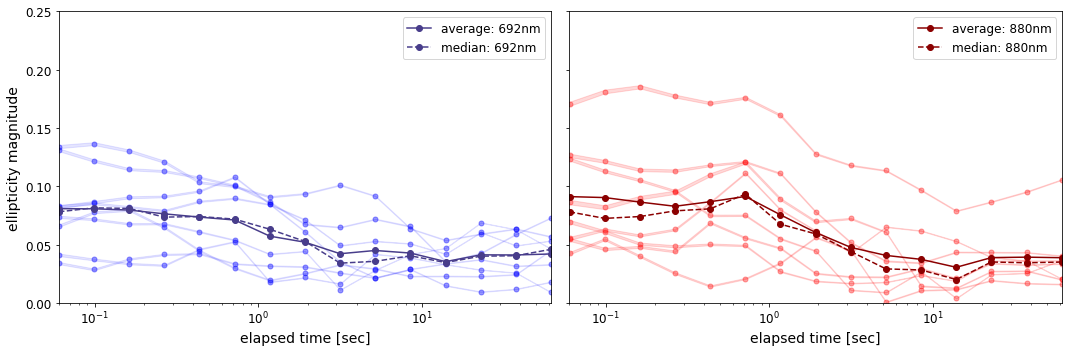

In [13]:
end_fit=1000
pts = np.logspace(-1.22,1.79,15)
    
if len(pts)>100:
	ms = 2
else:
	ms = 5

(l_a,l_b)=(692,880)

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15,5))

g_mag_a = []
g_mag_b = []

for i in backgrounds.keys():
    fit_a = pd.read_pickle(basedir+'fit_pickles/img_a_{}_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/img_b_{}_cumulative.p'.format(i))    
    
    err_a = np.sqrt( ((fit_a['g1']*fit_a['s_g1'])**2 + (fit_a['g2']*fit_a['s_g2'])**2)/(fit_a['g1']**2+fit_a['g2']**2))
    err_b = np.sqrt( ((fit_b['g1']*fit_b['s_g1'])**2 + (fit_b['g2']*fit_b['s_g2'])**2)/(fit_b['g1']**2+fit_b['g2']**2))
    
    g_a = (fit_a['g1']**2+fit_a['g2']**2)**.5
    g_b = (fit_b['g1']**2+fit_b['g2']**2)**.5
    g_mag_a.append(g_a)   
    g_mag_b.append(g_b)
    
    ax1.plot(pts, g_a,'bo',alpha=0.4,ms=ms)
    ax1.fill_between(pts, g_a+err_a, g_a-err_a, edgecolor='b',facecolor='b',alpha = 0.1)
    ax2.plot(pts, g_b,'ro',alpha=0.35,ms=ms)
    ax2.fill_between(pts, g_b+err_b, g_b-err_b, edgecolor='r',facecolor='r',alpha = 0.15)
    
g_mag_a = np.array(g_mag_a)
g_mag_b = np.array(g_mag_b)

ax1.plot(pts,np.mean(g_mag_a,axis=0),'o-',color='darkslateblue',label='average: 692nm')
ax1.plot(pts,np.median(g_mag_a,axis=0),'o--',color='darkslateblue',label='median: 692nm')

ax1.set_xscale('log')
# ax1.legend(title='filter a: 692nm',fontsize=16,loc=1)
ax1.legend(fontsize=12,loc=1)
ax1.set_ylabel("ellipticity magnitude",fontsize=14)
ax1.set_xlabel('elapsed time [sec]',fontsize=14)
ax1.set_xlim((0.06,.062*end_fit))
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.plot(pts,np.mean(g_mag_b,axis=0),'o-',color='darkred',label='average: 880nm')  
ax2.plot(pts,np.median(g_mag_b,axis=0),'o--',color='darkred',label='median: 880nm')

ax2.set_xscale('log')
# ax2.legend(title='filter b: 880nm',fontsize=16,loc=1)
ax2.legend(fontsize=12,loc=1)
ax2.set_xlabel('elapsed time [sec]',fontsize=14)
ax2.set_xlim((0.06,.062*end_fit))

maxy = np.max(np.array([g_mag_a,g_mag_b]))
ax1.set_ylim([0,0.25])
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=12)
# plot.tick_params(axis='both', which='minor', labelsize=8)

# plt.savefig('/Users/clairealice/Desktop/9_g_mag_dssi.png')
plt.show()
        

## Simulation

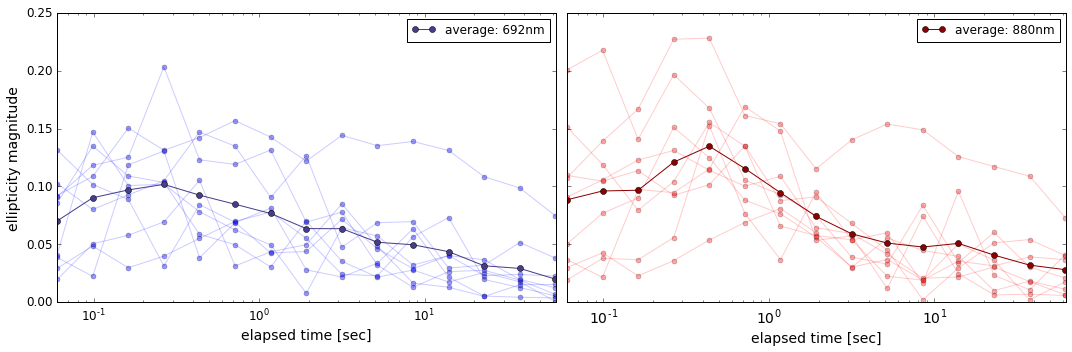

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15,5))

g_mag_sa = []
g_mag_sb = []

for i in range(9):
    fit_a = pd.read_pickle(basedir+'fit_pickles/sim_a_s{}_1000_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/sim_b_s{}_1000_cumulative.p'.format(i))    
    
#     err_a = np.sqrt( ((fit_a['g1']*fit_a['s_g1'])**2 + (fit_a['g2']*fit_a['s_g2'])**2)/(fit_a['g1']**2+fit_a['g2']**2))
#     err_b = np.sqrt( ((fit_b['g1']*fit_b['s_g1'])**2 + (fit_b['g2']*fit_b['s_g2'])**2)/(fit_b['g1']**2+fit_b['g2']**2))
    
    g_a = (fit_a['g1']**2+fit_a['g2']**2)**.5
    g_b = (fit_b['g1']**2+fit_b['g2']**2)**.5
    g_mag_sa.append(g_a)   
    g_mag_sb.append(g_b)
    
    ax1.plot(pts, g_a,'bo',alpha=0.4,ms=ms)
    ax1.plot(pts, g_a,'b-',alpha=0.2,ms=ms)
#     ax1.fill_between(pts, g_a+err_a, g_a-err_a, edgecolor='b',facecolor='b',alpha = 0.1)
    ax2.plot(pts, g_b,'ro',alpha=0.35,ms=ms)
    ax2.plot(pts, g_b,'r-',alpha=0.2,ms=ms)
#     ax2.fill_between(pts, g_b+err_b, g_b-err_b, edgecolor='r',facecolor='r',alpha = 0.15)
    
g_mag_sa = np.array(g_mag_sa)
g_mag_sb = np.array(g_mag_sb)

ax1.plot(pts,np.mean(g_mag_sa,axis=0),'o-',color='darkslateblue',label='average: 692nm')
ax1.set_xscale('log')
# ax1.legend(title='filter a: 692nm',fontsize=12,loc=1)
ax1.legend(fontsize=12,loc=1)
ax1.set_ylabel("ellipticity magnitude",fontsize=14)
ax1.set_xlabel('elapsed time [sec]',fontsize=14)
ax1.set_xlim((0.06,.062*end_fit))
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.plot(pts,np.mean(g_mag_sb,axis=0),'o-',color='darkred',label='average: 880nm')  
ax2.set_xscale('log')
# ax2.legend(title='filter b: 880nm',fontsize=12,loc=1)
ax2.legend(fontsize=12,loc=1)
ax2.set_xlabel('elapsed time [sec]',fontsize=14)
ax2.set_xlim((0.06,.062*end_fit))
plt.tick_params(axis='both', which='major', labelsize=14)

maxy = np.max(np.array([g_mag_sa,g_mag_sb]))
ax1.set_ylim([0,0.25])
plt.tight_layout()

# plt.savefig('/Users/clairealice/Desktop/9_g_mag_sim.png')
plt.show()
        

# HLR

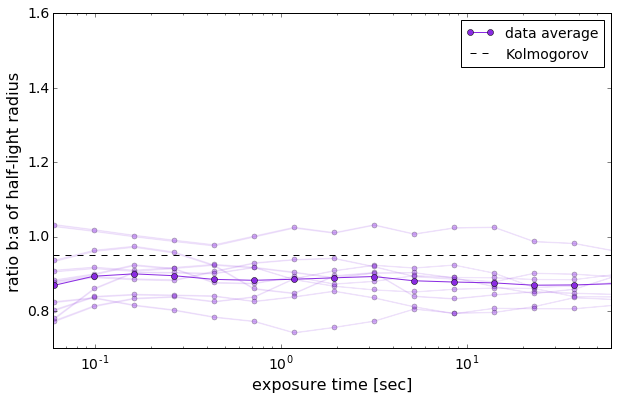

In [4]:
end_fit=1000
pts = np.logspace(-1.22,1.79,15)
    
if len(pts)>100:
	ms = 2
else:
	ms = 5

(l_a,l_b)=(692,880)

plt.figure(figsize=(10,6))
hlr_ratio = []

for i in backgrounds.keys():
    fit_a = pd.read_pickle(basedir+'fit_pickles/img_a_{}_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/img_b_{}_cumulative.p'.format(i))    
    
    r = fit_b['hlr'].values/fit_a['hlr'].values
    err = (1/fit_a['hlr'].values)*np.sqrt(fit_b['s_hlr']**2+(r)**2*fit_a['s_hlr']**2)
    
    hlr_ratio.append(r)   
    
    plt.plot(pts, r,'o',color='blueviolet',alpha=0.4,ms=ms)
    plt.fill_between(pts, r+err, r-err, edgecolor='blueviolet',facecolor='blueviolet',alpha = 0.1)
    
hlr_ratio = np.array(hlr_ratio)

plt.plot(pts,np.mean(hlr_ratio,axis=0),'o-',color='blueviolet',label='data average')
plt.axhline(0.95,color='k',ls='--',label='Kolmogorov')
plt.xscale('log')
plt.legend(loc=1,fontsize=14)
# plt.legend(title='filter a: 692nm',fontsize=12,loc=1)
plt.ylabel("ratio b:a of half-light radius",fontsize=16)
plt.xlabel('exposure time [sec]',fontsize=16)
plt.xlim((0.06,.06*end_fit))
# plt.ylim(ymax=1.06)
plt.ylim(ymin=.7,ymax=1.6)
# plt.yticks([0.7,0.8,0.9,1.0])
plt.tick_params(axis='both', which='major', labelsize=14)

# plt.savefig('/Users/clairealice/Desktop/9_hlr_dssi.png')

# plt.savefig(basedir+'9_dssi_fits/9_hlr_dssi.png')
plt.show()
        

## Simulation

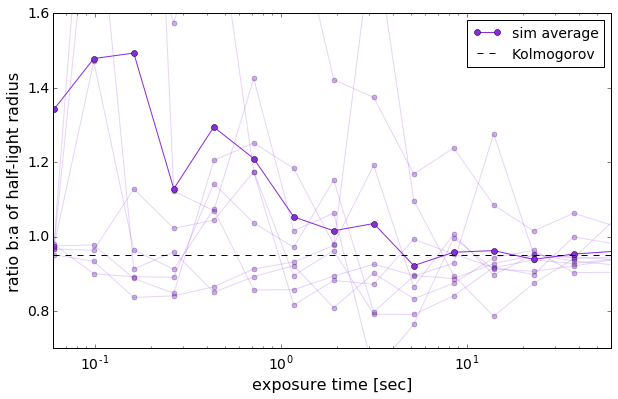

In [5]:
plt.figure(figsize=(10,6))
hlr_ratio_s = []

for i in range(9):
    fit_a = pd.read_pickle(basedir+'fit_pickles/sim_a_s{}_1000_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/sim_b_s{}_1000_cumulative.p'.format(i))  
    
    r = fit_b['hlr'].values/fit_a['hlr'].values
    err = (1/fit_a['hlr'].values)*np.sqrt(fit_b['s_hlr']**2+(r)**2*fit_a['s_hlr']**2)
    
    hlr_ratio_s.append(r)   
    
    plt.plot(pts, r,'o',color='blueviolet',alpha=0.4,ms=ms)
    plt.plot(pts, r,'-',color='blueviolet',alpha=0.2,ms=ms)
    #plt.fill_between(pts, r+err, r-err, edgecolor='blueviolet',facecolor='blueviolet',alpha = 0.1)
    
hlr_ratio_s = np.array(hlr_ratio_s)

plt.plot(pts,np.mean(hlr_ratio_s,axis=0),'o-',color='blueviolet',label='sim average')
plt.axhline(0.95,color='k',ls='--',label='Kolmogorov')
plt.xscale('log')
plt.legend(loc=1,fontsize=14)
# plt.legend(title='filter a: 692nm',fontsize=12,loc=1)
plt.ylabel("ratio b:a of half-light radius",fontsize=16)
plt.xlabel('exposure time [sec]',fontsize=16)
plt.xlim((0.06,.06*end_fit))
plt.ylim(ymin=.7,ymax=1.6)
plt.tick_params(axis='both', which='major', labelsize=14)

# plt.savefig('/Users/clairealice/Desktop/9_hlr_sim.png')

# plt.savefig(basedir+'9_dssi_fits/9_hlr_sim_wind90d.png')
plt.show()
        

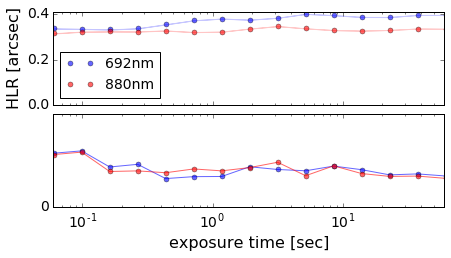

In [21]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(7,3.5))

fit_a = pd.read_pickle(basedir+'fit_pickles/img_a_{}_cumulative.p'.format('1039'))    
fit_b = pd.read_pickle(basedir+'fit_pickles/img_b_{}_cumulative.p'.format('1039'))  
err_b = fit_b['s_hlr']
err_a = fit_a['s_hlr']
        
ax1.plot(pts, fit_a['hlr'].values,'o',color='b',alpha=0.6,ms=ms,label='692nm')
ax1.fill_between(pts, fit_a['hlr'].values+err_a, fit_a['hlr'].values-err_a, 
                 edgecolor='b',facecolor='b',alpha = 0.2)
ax1.plot(pts, fit_b['hlr'].values,'o',color='r',alpha=0.6,ms=ms,label='880nm')
ax1.fill_between(pts, fit_b['hlr'].values+err_b, fit_b['hlr'].values-err_b, 
                 edgecolor='r',facecolor='r',alpha = 0.2)
ax1.legend(loc=3,fontsize=14)
ax1.set_xscale('log')
ax1.set_ylabel('HLR [arcsec]',fontsize=16)
ax1.set_ylim(ymin=0)
ax1.set_yticks([0.,0.2,0.4])
# ax1.set_title('data',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)

fit_a = pd.read_pickle(basedir+'fit_pickles/sim_a_s{}_1000_cumulative.p'.format('8'))    
fit_b = pd.read_pickle(basedir+'fit_pickles/sim_b_s{}_1000_cumulative.p'.format('8'))  
# err_b = fit_b['s_hlr']
# err_a = fit_a['s_hlr']
        
ax2.plot(pts, fit_a['hlr'].values,'o-',color='b',alpha=0.6,ms=ms,label='692nm')
ax2.plot(pts, fit_b['hlr'].values,'o-',color='r',alpha=0.6,ms=ms,label='880nm')
# ax2.fill_between(pts, fit_a['hlr'].values+err_a, fit_a['hlr'].values-err_a, 
#                  edgecolor='b',facecolor='b',alpha = 0.2)
# ax2.fill_between(pts, fit_b['hlr'].values+err_b, fit_b['hlr'].values-err_b, 
#                  edgecolor='r',facecolor='r',alpha = 0.2)
# ax2.legend(loc=3, fontsize=14)
ax2.set_xscale('log')
ax2.set_xlim([.06,60.])
ax2.set_xlabel('exposure time [sec]',fontsize=16)
# ax2.set_ylabel('HLR [arcsec]',fontsize=16)
ax2.set_ylim(ymin=0,ymax=.4)
ax2.set_yticks([0.])
# ax2.set_title('simulation',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.xaxis.set_tick_params(labelsize=14)

plt.subplots_adjust(wspace=0.0, hspace=0.1)
# plt.savefig(basedir+'/hlr_sim9_data1039.png')

# g1

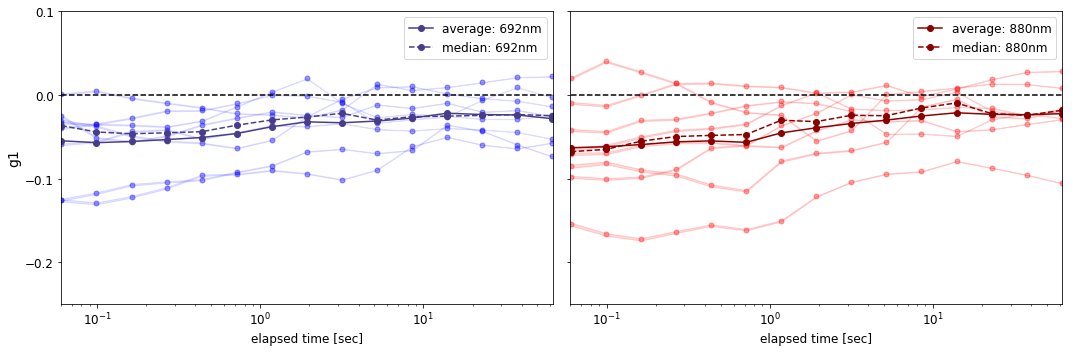

In [10]:
end_fit=1000
pts = np.logspace(-1.22,1.79,15)
    
if len(pts)>100:
	ms = 2
else:
	ms = 5

(l_a,l_b)=(692,880)

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15,5))

g1_a = []
g1_b = []

for i in backgrounds.keys():
    fit_a = pd.read_pickle(basedir+'fit_pickles/img_a_{}_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/img_b_{}_cumulative.p'.format(i))    
    
    err_a = fit_a['s_g1']
    err_b = fit_b['s_g1']
    
    g1_a.append(fit_a['g1'])   
    g1_b.append(fit_b['g1'])
    
    ax1.plot(pts, fit_a['g1'].values,'bo',alpha=0.4,ms=ms)
    ax1.fill_between(pts, fit_a['g1']+err_a, fit_a['g1']-err_a, edgecolor='b',facecolor='b',alpha = 0.1)
    ax2.plot(pts, fit_b['g1'].values,'ro',alpha=0.35,ms=ms)
    ax2.fill_between(pts, fit_b['g1']+err_b, fit_b['g1']-err_b, edgecolor='r',facecolor='r',alpha = 0.15)
    
g1_a = np.array(g1_a)
g1_b = np.array(g1_b)

ax1.plot(pts,np.zeros(len(pts)),'k--')
ax1.plot(pts,np.mean(g1_a,axis=0),'o-',color='darkslateblue',label='average: 692nm')
ax1.plot(pts,np.median(g1_a,axis=0),'o--',color='darkslateblue',label='median: 692nm')

ax1.set_xscale('log')
ax1.legend(fontsize=12,loc=1)
ax1.set_ylabel("g1",fontsize=14)
ax1.set_xlabel('elapsed time [sec]',fontsize=12)
ax1.set_xlim((0.06,.062*end_fit))
ax1.yaxis.set_tick_params(labelsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.set_yticks([-0.2,-0.1,0,0.1])

ax2.plot(pts,np.zeros(len(pts)),'k--')
ax2.plot(pts,np.mean(g1_b,axis=0),'o-',color='darkred',label='average: 880nm')  
ax2.plot(pts,np.median(g1_b,axis=0),'o--',color='darkred',label='median: 880nm')
ax2.set_xscale('log')
ax2.legend(fontsize=12,loc=1)
ax2.set_xlabel('elapsed time [sec]',fontsize=12)
ax2.set_xlim((0.06,.062*end_fit))
ax2.xaxis.set_tick_params(labelsize=12)


maxy = np.max(np.array([g1_a,g1_b]))
miny = np.min(np.array([g1_a,g1_b]))
ax1.set_ylim([-0.25,0.1])
plt.tight_layout()

# plt.savefig(basedir+'9_dssi_fits/9_g1_dssi.png')
plt.show()

## Simulation

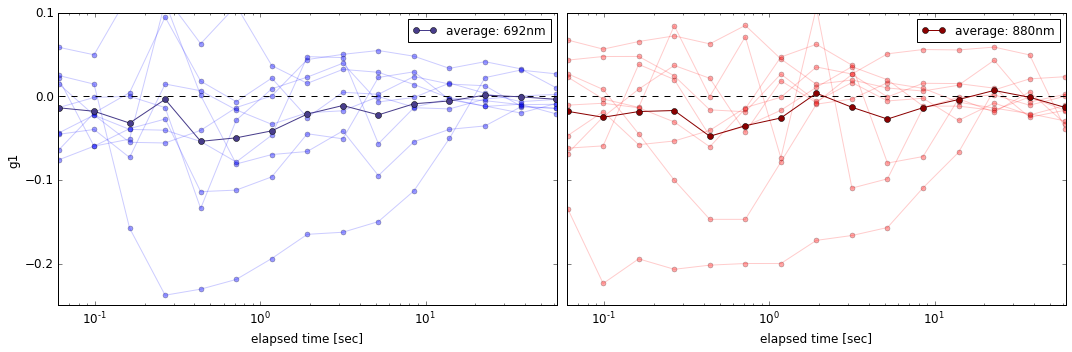

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15,5))

g1_sa = []
g1_sb = []

for i in range(9):
    fit_a = pd.read_pickle(basedir+'fit_pickles/sim_wind90d_a_s{}_1000_cumulative.p'.format(i))   
    fit_b = pd.read_pickle(basedir+'fit_pickles/sim_wind90d_b_s{}_1000_cumulative.p'.format(i))
    
    err_a = fit_a['s_g1']
    err_b = fit_b['s_g1']
    
    g1_sa.append(fit_a['g1'])   
    g1_sb.append(fit_b['g1'])
    
    ax1.plot(pts, fit_a['g1'].values,'bo',alpha=0.4,ms=ms)
    ax1.plot(pts, fit_a['g1'].values,'b-',alpha=0.2,ms=ms)
#     ax1.fill_between(pts, fit_a['g1']+err_a, fit_a['g1']-err_a, edgecolor='b',facecolor='b',alpha = 0.1)
    ax2.plot(pts, fit_b['g1'].values,'ro',alpha=0.35,ms=ms)
    ax2.plot(pts, fit_b['g1'].values,'r-',alpha=0.2,ms=ms)
#     ax2.fill_between(pts, fit_b['g1']+err_b, fit_b['g1']-err_b, edgecolor='r',facecolor='r',alpha = 0.15)
    
g1_sa = np.array(g1_sa)
g1_sb = np.array(g1_sb)

ax1.plot(pts,np.zeros(len(pts)),'k--')
ax1.plot(pts,np.mean(g1_sa,axis=0),'o-',color='darkslateblue',label='average: 692nm')
ax1.set_xscale('log')
ax1.legend(fontsize=12,loc=1)
ax1.set_ylabel("g1",fontsize=12)
ax1.set_xlabel('elapsed time [sec]',fontsize=12)
ax1.set_xlim((0.06,.062*end_fit))
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_yticks([-0.2,-0.1,0,0.1])
ax1.yaxis.set_tick_params(labelsize=12)
ax1.xaxis.set_tick_params(labelsize=12)


ax2.plot(pts,np.zeros(len(pts)),'k--')
ax2.plot(pts,np.mean(g1_sb,axis=0),'o-',color='darkred',label='average: 880nm')  
ax2.set_xscale('log')
ax2.legend(fontsize=12,loc=1)
ax2.set_xlabel('elapsed time [sec]',fontsize=12)
ax2.set_xlim((0.06,.062*end_fit))
ax2.xaxis.set_tick_params(labelsize=12)


maxy = np.max(np.array([g1_sa,g1_sb]))
miny = np.min(np.array([g1_sa,g1_sb]))
ax1.set_ylim([-.25,.1])
plt.tight_layout()

# plt.savefig(basedir+'9_dssi_fits/9_g1_sim.png')
plt.show()

# g2

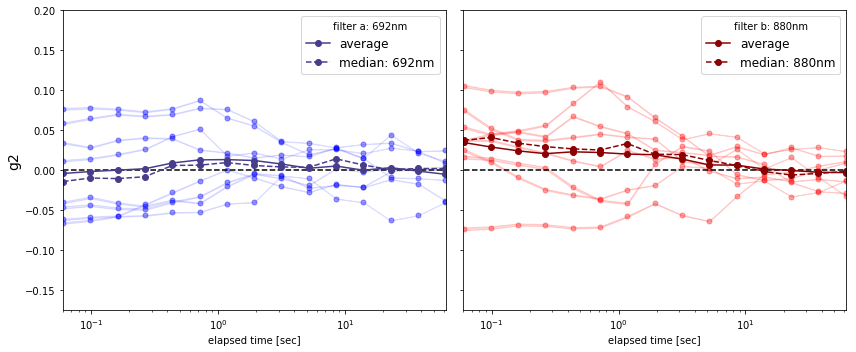

In [12]:
end_fit=1000
pts = np.logspace(-1.22,1.79,15)
    
if len(pts)>100:
	ms = 2
else:
	ms = 5

(l_a,l_b)=(692,880)

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,5))

g2_a = []
g2_b = []

for i in backgrounds.keys():
    fit_a = pd.read_pickle(basedir+'fit_pickles/img_a_{}_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/img_b_{}_cumulative.p'.format(i))    
    
    err_a = fit_a['s_g2']
    err_b = fit_b['s_g2']
    
    g2_a.append(fit_a['g2'])   
    g2_b.append(fit_b['g2'])
    
    ax1.plot(pts, fit_a['g2'].values,'bo',alpha=0.4,ms=ms)
    ax1.fill_between(pts, fit_a['g2']+err_a, fit_a['g2']-err_a, edgecolor='b',facecolor='b',alpha = 0.1)
    ax2.plot(pts, fit_b['g2'].values,'ro',alpha=0.35,ms=ms)
    ax2.fill_between(pts, fit_b['g2']+err_b, fit_b['g2']-err_b, edgecolor='r',facecolor='r',alpha = 0.15)
    
g2_a = np.array(g2_a)
g2_b = np.array(g2_b)

ax1.plot(pts,np.zeros(len(pts)),'k--')
ax1.plot(pts,np.mean(g2_a,axis=0),'o-',color='darkslateblue',label='average')
ax1.plot(pts,np.median(g2_a,axis=0),'o--',color='darkslateblue',label='median: 692nm')

ax1.set_xscale('log')
ax1.legend(title='filter a: 692nm',fontsize=12,loc=1)
ax1.set_ylabel("g2",fontsize=14)
ax1.set_xlabel('elapsed time [sec]')
ax1.set_xlim((0.06,.062*end_fit))

ax2.plot(pts,np.zeros(len(pts)),'k--')
ax2.plot(pts,np.mean(g2_b,axis=0),'o-',color='darkred',label='average')  
ax2.plot(pts,np.median(g2_b,axis=0),'o--',color='darkred',label='median: 880nm')

ax2.set_xscale('log')
ax2.legend(title='filter b: 880nm',fontsize=12,loc=1)
ax2.set_xlabel('elapsed time [sec]')
ax2.set_xlim((0.06,.062*end_fit))

maxy = np.max(np.array([g2_a,g2_b]))
miny = np.min(np.array([g2_a,g2_b]))
ax1.set_ylim([-.175,0.2])
plt.tight_layout()

# plt.savefig(basedir+'9_dssi_fits/9_g2_dssi.png')
plt.show()

## Simulation

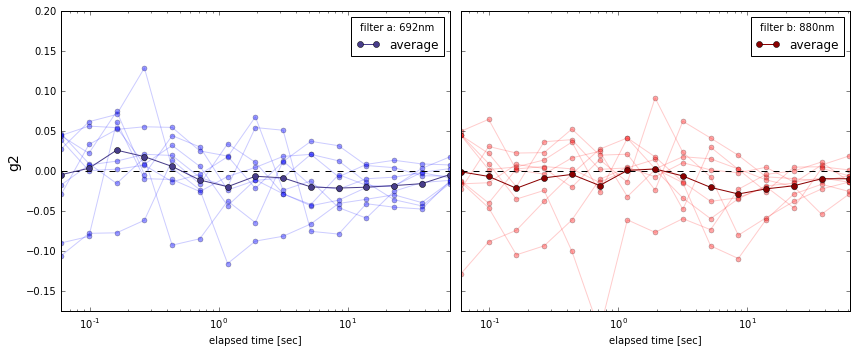

In [301]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,5))

g2_sa = []
g2_sb = []

for i in range(9):
    fit_a = pd.read_pickle(basedir+'fit_pickles/sim_wind90d_a_s{}_1000_cumulative.p'.format(i))    
    fit_b = pd.read_pickle(basedir+'fit_pickles/sim_wind90d_b_s{}_1000_cumulative.p'.format(i))    
    
    err_a = fit_a['s_g2']
    err_b = fit_b['s_g2']
    
    g2_sa.append(fit_a['g2'])   
    g2_sb.append(fit_b['g2'])
    
    ax1.plot(pts, fit_a['g2'].values,'bo',alpha=0.4,ms=ms)
    ax1.plot(pts, fit_a['g2'].values,'b-',alpha=0.2,ms=ms)
#     ax1.fill_between(pts, fit_a['g2']+err_a, fit_a['g2']-err_a, edgecolor='b',facecolor='b',alpha = 0.1)
    ax2.plot(pts, fit_b['g2'].values,'ro',alpha=0.35,ms=ms)
    ax2.plot(pts, fit_b['g2'].values,'r-',alpha=0.2,ms=ms)
#     ax2.fill_between(pts, fit_b['g2']+err_b, fit_b['g2']-err_b, edgecolor='r',facecolor='r',alpha = 0.15)
    
g2_sa = np.array(g2_sa)
g2_sb = np.array(g2_sb)

ax1.plot(pts,np.zeros(len(pts)),'k--')
ax1.plot(pts,np.mean(g2_sa,axis=0),'o-',color='darkslateblue',label='average')
ax1.set_xscale('log')
ax1.legend(title='filter a: 692nm',fontsize=12,loc=1)
ax1.set_ylabel("g2",fontsize=14)
ax1.set_xlabel('elapsed time [sec]')
ax1.set_xlim((0.06,.062*end_fit))

ax2.plot(pts,np.zeros(len(pts)),'k--')
ax2.plot(pts,np.mean(g2_sb,axis=0),'o-',color='darkred',label='average')  
ax2.set_xscale('log')
ax2.legend(title='filter b: 880nm',fontsize=12,loc=1)
ax2.set_xlabel('elapsed time [sec]')
ax2.set_xlim((0.06,.062*end_fit))

maxy = np.max(np.array([g2_sa,g2_sb]))
miny = np.min(np.array([g2_sa,g2_sb]))
ax1.set_ylim([-.175,0.2])
plt.tight_layout()

plt.savefig(basedir+'9_dssi_fits/9_g2_sim_wind90d.png')
plt.show()

# g1 vs g2

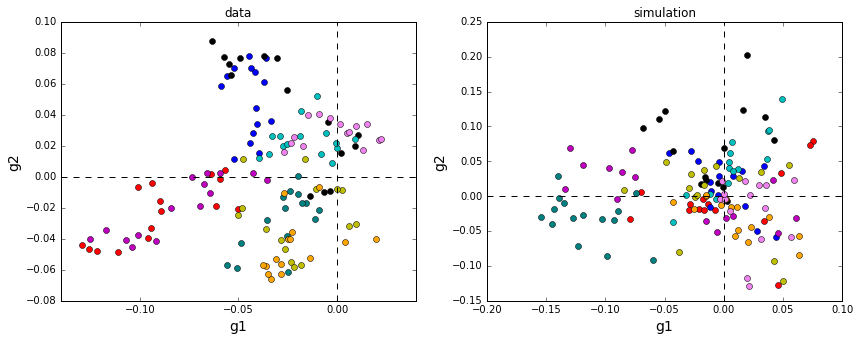

In [72]:
plt.figure(figsize=(14,5))
color=['r','b','k','y','m','c','teal','orange','violet']

plt.subplot(1,2,1)
plt.title('data')
for i in range(9):
    plt.plot(g1_a[i],g2_a[i],'o',color=color[i])
plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
plt.xlabel('g1',fontsize=14)
plt.ylabel('g2',fontsize=14)

plt.subplot(1,2,2)
plt.title('simulation')
for i in range(9):
    plt.plot(g1_sa[i],g2_sa[i],'o',color=color[i])
plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
plt.xlabel('g1',fontsize=14)
plt.ylabel('g2',fontsize=14)
plt.show()

# Cross Section Plots

## Simulation

In [4]:
sim_seed = 1
filename = 'simulation/sim_a_s{}_1000_cumulative.fits'.format(str(sim_seed))
hdulist = fits.open(basedir + filename)
sim_a_s1 = hdulist[0].data
sim_back = 1

sim_sample_60ms = sim_a_s1[0]*1.3e7
sim_sample_30s = sim_a_s1[500]*1.3e7

points = np.linspace(0,256,256)

## 60ms 
#find best fit
sim_result_60ms = fit_single_exposure(sim_sample_60ms,p_scale,sim_back)
sim_model_60ms = plot_k_model(sim_result_60ms.params,np.shape(sample_60ms))
x = int(sim_result_60ms.params['offset_x'])+128
y = int(sim_result_60ms.params['offset_y'])+128

#x and y cross sections for 60ms data and model
sim_sample_60ms_x = sim_sample_60ms[x]
sim_sample_60ms_y = sim_sample_60ms[:,y]
sim_model_60ms_x = sim_model_60ms[x]
sim_model_60ms_y = sim_model_60ms[:,y]
#uncertainty
sim_err_60ms_x = np.sqrt(sim_back**2 + abs(sim_sample_60ms_x-sim_result_60ms.params['background']))
sim_err_60ms_y = np.sqrt(sim_back**2 + abs(sim_sample_60ms_y-sim_result_60ms.params['background']))

## 30s 
#find best fit
sim_result_30s = fit_single_exposure(sim_sample_30s,p_scale,sim_back,N_exp=500)
sim_model_30s = plot_k_model(sim_result_30s.params,np.shape(sim_sample_30s))
x_30 = int(sim_result_30s.params['offset_x'])+128
y_30 = int(sim_result_30s.params['offset_y'])+128

#x and y cross sections for 60ms data and model
sim_sample_30s_x = sim_sample_30s[x_30]
sim_sample_30s_y = sim_sample_30s[:,y_30]
sim_model_30s_x = sim_model_30s[x_30]
sim_model_30s_y = sim_model_30s[:,y_30]
#uncertainty
sim_err_30s_x = np.sqrt(sim_back**2 + abs(sim_sample_30s_x-sim_result_30s.params['background']))
sim_err_30s_y = np.sqrt(sim_back**2 + abs(sim_sample_30s_y-sim_result_30s.params['background']))

## Data

In [91]:
data_number = '1262'
filename = 'speckleImagers/img_a_{}_cumulative.fits'.format(data_number)
color='b'
hdulist = fits.open(basedir + filename)
dssi_a_1039 = hdulist[0].data

sample_60ms = np.fliplr(dssi_a_1039[0])*gains[data_number][color]
sample_30s = np.fliplr(dssi_a_1039[500])*gains[data_number][color]

points = np.linspace(0,256,256)

## 60ms 
#find best fit
result_60ms = fit_single_exposure(sample_60ms,p_scale,backgrounds[data_number][color])
model_60ms = plot_k_model(result_60ms.params,np.shape(sample_60ms))
x = int(result_60ms.params['offset_x'])+128
y = int(result_60ms.params['offset_y'])+128

#x and y cross sections for 60ms data and model
sample_60ms_x = sample_60ms[x] - result_60ms.params['background'] 
sample_60ms_y = sample_60ms[:,y] - result_60ms.params['background']
model_60ms_x = model_60ms[x] - result_60ms.params['background']
model_60ms_y = model_60ms[:,y] - result_60ms.params['background']
#uncertainty
err_60ms_x = np.sqrt(backgrounds[data_number][color]**2 + abs(sample_60ms_x-result_60ms.params['background']))
err_60ms_y = np.sqrt(backgrounds[data_number][color]**2 + abs(sample_60ms_y-result_60ms.params['background']))

## 30s 
#find best fit
result_30s = fit_single_exposure(sample_30s,p_scale,backgrounds[data_number][color],N_exp=500)
model_30s = plot_k_model(result_30s.params,np.shape(sample_30s))
x_30 = int(result_30s.params['offset_x'])+128
y_30 = int(result_30s.params['offset_y'])+128

#x and y cross sections for 60ms data and model
sample_30s_x = sample_30s[x_30] - result_30s.params['background']
sample_30s_y = sample_30s[:,y_30] - result_30s.params['background']
model_30s_x = model_30s[x_30] - result_30s.params['background']
model_30s_y = model_30s[:,y_30] - result_30s.params['background']
#uncertainty
err_30s_x = np.sqrt(backgrounds[data_number][color]**2 + abs(sample_30s_x-result_30s.params['background']))
err_30s_y = np.sqrt(backgrounds[data_number][color]**2 + abs(sample_30s_y-result_30s.params['background']))

## Plot

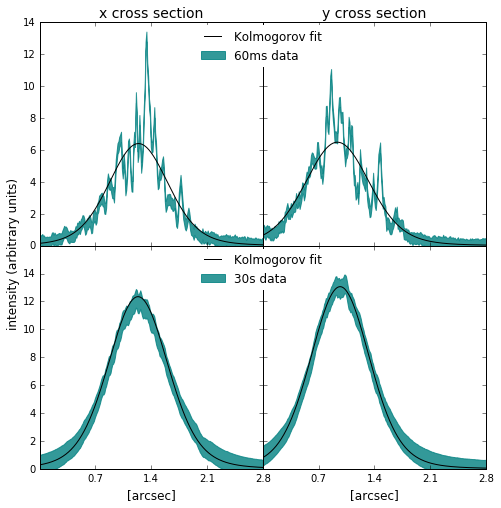

In [95]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8),sharey='row',sharex=True)
tick_labels = [.7,1.4,2.1,2.8]
ticks = [64,128,192,256]

##DATA
datac = 'teal'
datac2 = 'teal'
#x
ax1.fill_between(points,sample_60ms_x+err_60ms_x,sample_60ms_x-err_60ms_x,facecolor=datac2,
                 edgecolor=datac2,alpha=0.8)
ax1.plot(points,model_60ms_x,'k')
# ax1.set_ylabel('intensity (arbitrary units)',fontsize=12)
ax1.set_yticklabels([0,2,4,6,8,10,12,14,16,18,20])
ax1.set_title('x cross section',fontsize=14)
ax1.set_ylim(ymin=0,ymax=7000)

ax3.fill_between(points,sample_30s_x+err_30s_x,sample_30s_x-err_30s_x,facecolor=datac,edgecolor=datac,alpha=0.8)
ax3.plot(points,model_30s_x,'k')
# ax3.set_ylabel('intensity (arbitrary units)',fontsize=12)
ax3.set_yticklabels([0,2,4,6,8,10,12,14])
ax3.set_xticks(ticks)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('[arcsec]',fontsize=12)
ax3.set_ylim(ymin=0,ymax=4000)

#y
ax2.fill_between(points,sample_60ms_y+err_60ms_y,sample_60ms_y-err_60ms_y,facecolor=datac2,
                 edgecolor=datac2, alpha=0.8, label='60ms data')
ax2.plot(points,model_60ms_y,'k',label='Kolmogorov fit')
ax2.set_title('y cross section',fontsize=14)
leg=ax2.legend(loc=(-.3,.8))
leg.get_frame().set_linewidth(0.0)

ax4.fill_between(points,sample_30s_y+err_30s_y,sample_30s_y-err_30s_y,facecolor=datac,edgecolor=datac,
                 alpha=.8,label='30s data')
ax4.plot(points,model_30s_y,'k',label='Kolmogorov fit')
ax4.set_xlabel('[arcsec]',fontsize=12)
leg=ax4.legend(loc=(-.3,.8))
leg.get_frame().set_linewidth(0.0)
fig.text(0.08, 0.5, 'intensity (arbitrary units)', ha='center', va='center', rotation='vertical',fontsize=12)

plt.subplots_adjust(wspace=0.0, hspace=0)
plt.savefig(basedir+'cross_sections/cross_section_{}{}.png'.format(str(data_number),color))
plt.show()

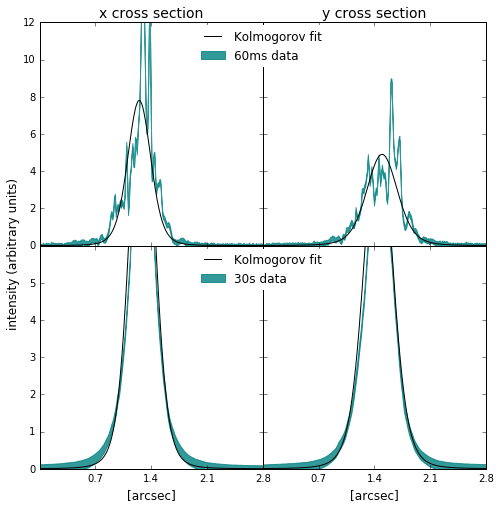

In [6]:
# ##SIMULATION
# fig, ((ax5,ax6),(ax7,ax8)) = plt.subplots(2,2,figsize=(8,8),sharey='row',sharex=True) 
# simc = 'chocolate'
# simc2 = 'chocolate'

# #x
# ax5.fill_between(points,sim_sample_60ms_x+sim_err_60ms_x,sim_sample_60ms_x-sim_err_60ms_x,
#                  facecolor=simc2,edgecolor=simc2,alpha=0.75)
# ax5.plot(points,sim_model_60ms_x,'k')
# ax5.set_title('x cross section',fontsize=14)
# # ax5.set_ylabel('intensity (arbitrary units)',fontsize=12)
# ax5.set_yticklabels([0,2,4,6,8,10,12])
# ax5.set_ylim(ymin=0,ymax=12000)

# ax7.fill_between(points,sim_sample_30s_x+sim_err_30s_x,sim_sample_30s_x-sim_err_30s_x,facecolor=simc,
#                  edgecolor=simc,alpha=0.8)
# ax7.plot(points,sim_model_30s_x,'k')
# ax7.set_xlabel('[arcsec]',fontsize=12)
# # ax7.set_ylabel('intensity (arbitrary units)',fontsize=12)
# ax7.set_yticklabels([0,1,2,3,4,5])
# ax7.set_ylim(ymin=0,ymax=6000)

# #y
# ax6.fill_between(points,sim_sample_60ms_y+sim_err_60ms_y,sim_sample_60ms_y-sim_err_60ms_y,
#                  facecolor=simc2,edgecolor=simc2,alpha=0.75,label='60ms simulated')
# ax6.plot(points,sim_model_60ms_y,'k',label='Kolmogorov fit')
# ax6.set_title('y cross section',fontsize=14)
# leg=ax6.legend(loc=(-.31,.8))
# leg.get_frame().set_linewidth(0.0)

# ax8.fill_between(points,sim_sample_30s_y+sim_err_30s_y,sim_sample_30s_y-sim_err_30s_y,facecolor=simc,
#                 edgecolor=simc,alpha=0.8,label='30s simulated')
# ax8.plot(points,sim_model_30s_y,'k',label='Kolmogorov fit')
# ax8.set_xlabel('[arcsec]',fontsize=12)
# ax8.set_xlim(xmax=256)
# ax8.set_xticks(ticks)
# ax8.set_xticklabels(tick_labels)
# leg = ax8.legend(loc=(-.3,.8))
# leg.get_frame().set_linewidth(0.0)
# fig.text(0.08, 0.5, 'intensity (arbitrary units)', ha='center', va='center', rotation='vertical',fontsize=12)

# plt.subplots_adjust(wspace=0.0, hspace=0)

# plt.savefig(basedir+'cross_section_.png')
# plt.show()